# Problem Set 2: Asset Pricing Models & Portfolio Choice

## Task 1: Analyzing Beta Sorted Portfolios

### a)

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import norm, kurtosis, skew
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from dateutil.relativedelta import relativedelta

In [55]:
data_beta = pd.read_csv(r'ToF_2021_data_PS-3_beta_pf.csv', delimiter=';', header=0, index_col = 0)
data_beta.index = pd.to_datetime(data_beta.index, format='%Y%m')
#print(data_beta.index)
print(data_beta.head(n = 5))
#data_beta.set_index('date', drop = True, inplace = True)


data_FF = pd.read_csv(r'ToF_2021_data_PS-3_FF.csv', delimiter=';', index_col = 0)
data_FF.index = pd.to_datetime(data_FF.index, format='%Y%m')
#data_FF.set_index('date', drop = True, inplace = True)
print(data_FF.head(n = 5))

             beta1   beta2   beta3   beta4   beta5   beta6   beta7   beta8  \
date                                                                         
1963-07-01  0.0135  0.0077  0.0008 -0.0024 -0.0069 -0.0120 -0.0049 -0.0139   
1963-08-01  0.0352  0.0389  0.0429  0.0525  0.0523  0.0755  0.0757  0.0491   
1963-09-01 -0.0309 -0.0224 -0.0054 -0.0097 -0.0137 -0.0027 -0.0063 -0.0100   
1963-10-01  0.0125 -0.0012  0.0200  0.0512  0.0232  0.0178  0.0663  0.0478   
1963-11-01 -0.0091 -0.0015  0.0160 -0.0205 -0.0094 -0.0069 -0.0132 -0.0051   

             beta9  beta10  
date                        
1963-07-01 -0.0194 -0.0077  
1963-08-01  0.0904  0.1047  
1963-09-01 -0.0192 -0.0368  
1963-10-01  0.0310  0.0301  
1963-11-01 -0.0020  0.0052  
            Mkt_RF     SMB     HML     RMW     CMA      RF
date                                                      
1963-07-01 -0.0039 -0.0045 -0.0094  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0082  0.0182  0.0040 -0.0040  0.0025
1963-09-01 -0.

In [56]:
rf_adj = data_FF['RF'].to_numpy()
statistics = pd.DataFrame(columns = data_beta.columns, index = ['Annual_Mean_Return', 'Annual_Std', 'Annual_Excess_Return', 'Annual_Excess_Std', "Annual_Sharpe_Ratio"])
for column in data_beta.columns:
    returns_adj = data_beta[column].to_numpy()
    mean_return = np.mean(returns_adj) * 12
    statistics.loc['Annual_Mean_Return', column] = mean_return
    std = 12**0.5 * np.std(returns_adj)
    statistics.loc['Annual_Std', column] = std
    excess_return = np.sum(returns_adj - rf_adj)/56
    statistics.loc['Annual_Excess_Return', column] = excess_return
    excess_std = np.std(returns_adj)*(12**0.5)
    # excess_std = np.std(returns_adj - rf_adj)*(12**0.5)
    statistics.loc['Annual_Excess_Std', column] = excess_std
    sharpe_ratio = excess_return / excess_std
    statistics.loc["Annual_Sharpe_Ratio", column] = sharpe_ratio
    
print(statistics)


                         beta1     beta2     beta3     beta4     beta5  \
Annual_Mean_Return    0.112186  0.109293  0.118481  0.130431  0.118619   
Annual_Std            0.119012  0.131352  0.140925  0.158933  0.165454   
Annual_Excess_Return  0.070293  0.067296  0.076812  0.089189  0.076955   
Annual_Excess_Std     0.119012  0.131352  0.140925  0.158933  0.165454   
Annual_Sharpe_Ratio   0.590637  0.512338  0.545061  0.561174  0.465116   

                         beta6     beta7     beta8     beta9    beta10  
Annual_Mean_Return    0.128726  0.114752  0.137202  0.126393  0.133314  
Annual_Std            0.178226  0.189436  0.208976   0.23108  0.273389  
Annual_Excess_Return  0.087423   0.07295  0.096202  0.085007  0.092175  
Annual_Excess_Std     0.178226  0.189436  0.208976   0.23108  0.273389  
Annual_Sharpe_Ratio   0.490519  0.385091  0.460349  0.367868  0.337157  


## b)

In [57]:
CAPM_Stats = pd.DataFrame(columns = data_beta.columns, index =['Alpha', 'Beta', 'P-Value', 'Coefficient Of Determination'])
for column in data_beta.columns:
    LR = sm.OLS(data_beta[column].to_numpy(), sm.add_constant(data_FF['Mkt_RF'].to_numpy()))
    LR_results = LR.fit()
    LR_results.params
    CAPM_Stats.loc['Beta', column] = LR_results.params[1]
    CAPM_Stats.loc['Alpha', column] = LR_results.params[0]
    CAPM_Stats.loc['P-Value', column] = LR_results.pvalues[1]
    CAPM_Stats.loc['Coefficient Of Determination', column] = LR_results.rsquared
    # print(LR_results.summary())
   
statistics = pd.concat([statistics, CAPM_Stats])
print(statistics)


                                 beta1     beta2     beta3     beta4  \
Annual_Mean_Return            0.112186  0.109293  0.118481  0.130431   
Annual_Std                    0.119012  0.131352  0.140925  0.158933   
Annual_Excess_Return          0.070293  0.067296  0.076812  0.089189   
Annual_Excess_Std             0.119012  0.131352  0.140925  0.158933   
Annual_Sharpe_Ratio           0.590637  0.512338  0.545061  0.561174   
Alpha                         0.005832  0.004859   0.00502  0.005233   
Beta                          0.603294  0.728863  0.832628  0.966916   
P-Value                            0.0       0.0       0.0       0.0   
Coefficient Of Determination  0.610967  0.732085  0.829985  0.880012   

                                 beta5     beta6     beta7     beta8  \
Annual_Mean_Return            0.118619  0.128726  0.114752  0.137202   
Annual_Std                    0.165454  0.178226  0.189436  0.208976   
Annual_Excess_Return          0.076955  0.087423   0.07295  0.0

## c) Plot the PF's mean returns (y) against estimated betas and indicate the Mkt PF as well as the security market line

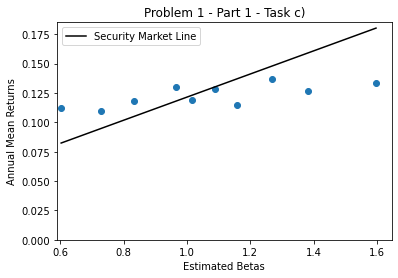

In [58]:
statistics_t = np.transpose(statistics)
X = np.array(statistics_t['Beta'], dtype=float)
Y = np.array(statistics_t['Annual_Mean_Return'], dtype=float)
plt.scatter(X,Y)

b, m = np.polyfit(X, Y, 1)

plt.plot(X, Y, '.')
plt.plot(X, b+m * X, '-', color='Black', label = 'Security Market Line')
plt.xlim(xmin=0.59)
plt.legend()
plt.ylim(ymin=0)

plt.title('Problem 1 - Part 1 - Task c)')
plt.xlabel('Estimated Betas')
plt.ylabel('Annual Mean Returns')
plt.show()

## d) Plot the PF's Alphas (y) versus betas (x) 

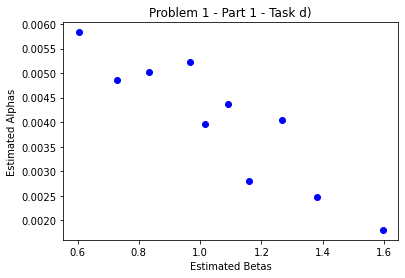

In [59]:
plt.plot(statistics_t['Beta'], statistics_t['Alpha'], 'ro', color='Blue')

plt.xlabel('Estimated Betas')
plt.ylabel('Estimated Alphas')

plt.title('Problem 1 - Part 1 - Task d)')
plt.show()

## e) Plot the Regression R2 (y) against the PF's betas (x)

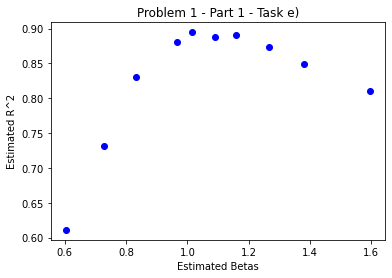

In [61]:
plt.plot(statistics_t['Beta'], statistics_t['Coefficient Of Determination'], 'ro', color='Blue')

plt.xlabel('Estimated Betas')
plt.ylabel('Estimated R^2')

plt.title('Problem 1 - Part 1 - Task e)')
plt.show()
